First: 9 with measure 154.11111111111111
For n_clusters = 9 The average silhouette_score is : 0.3476053004475335


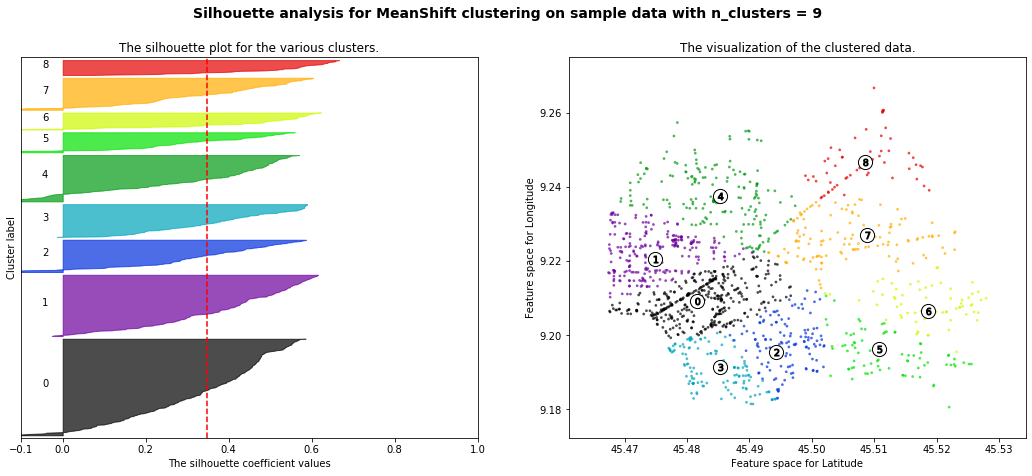

In [70]:
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from importlib import reload

import a2a_clustering
import a2a_validation
import a2a_travellingsalesman

a2a_clustering = reload(a2a_clustering)
a2a_validation = reload(a2a_validation)
a2a_travellingsalesman = reload(a2a_travellingsalesman)

###################
# CLUSTERING STEP #
###################

#n_clusters = 15
RANDOM_SEED = 0
ALGORITHM = "MeanShift"
PATH = 'output/clustering/'
FILE_PREFIX = PATH + 'meanshift_' + str(n_clusters) + '_'

df = pd.read_csv("output/data_preparation/first_visit.20190903.csv",
    parse_dates=['created_at'], date_parser=lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

X = a2a_clustering.transform(df)

init_bandwidth = 0.0090
bandwidth = init_bandwidth
clusterer = MeanShift(bandwidth = bandwidth, min_bin_freq = 70).fit(X)
cluster_labels = clusterer.labels_
n_clusters = len(np.unique(clusterer.labels_))
clusters_measure = a2a_clustering.get_cluster_measure(cluster_labels)
print("First: " + str(n_clusters) + " with measure " + str(clusters_measure))

'''while(n_clusters <= 20):
    bandwidth -= 0.0005
    clusterer_temp = MeanShift(bandwidth = bandwidth).fit(X)
    cluster_labels = clusterer_temp.labels_ 
    n_clusters = len(np.unique(cluster_labels))
    clusters_measure_temp = a2a_clustering.get_cluster_measure(cluster_labels)
    print("bandwith: " + str(bandwidth) + " clusters: " + str(n_clusters) + " measure: " + str(clusters_measure_temp))
    #when we found a valid clustering we stop the execution
    if(n_clusters >= 15 and n_clusters <= 20):
        print("Attempt: " + str(n_clusters) + " with measure " + str(clusters_measure_temp))
        if clusters_measure_temp < clusters_measure:
            print(" - found " + str(n_clusters) + " clusters with measure " + str(clusters_measure_temp))
            clusterer = clusterer_temp
            clusters_measure = clusters_measure_temp
'''

#recompute
cluster_labels = clusterer.labels_
cluster_centers_ = clusterer.cluster_centers_
clusters_distance = a2a_clustering.get_cluster_measure(cluster_labels)
            
df = df.assign(**{
    'Cluster_labels': cluster_labels
})

centroid_csv = np.asarray(clusterer.cluster_centers_)
np.savetxt(FILE_PREFIX + "centroids.csv", 
    centroid_csv, 
    header="lat,lng", 
    delimiter=",", 
    comments='')

###################
# VALIDATION STEP #
###################

df = a2a_validation.silhouette(df, clusterer.cluster_centers_, FILE_PREFIX, ALGORITHM)
df.to_csv(FILE_PREFIX + "clusterized_dataset.csv")

In [71]:
###################
# TSP        STEP #
###################

tsp_solved = a2a_travellingsalesman.tsp(df, FILE_PREFIX)
tsp_solved.to_csv(FILE_PREFIX + 'tsp.csv')
tsp_solved

,cluster,or_dist,meters,time,time_emptying,seconds,bins,waypoints
0,0,70422.193000,70 Km 422.20 m.,2:48:13,9:06:13,10093.200000,378.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
1,1,53571.898000,53 Km 571.90 m.,2:07:43,6:07:43,7663.700000,240.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
2,2,46532.500000,46 Km 532.50 m.,1:49:38,3:56:38,6578.600000,127.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
3,3,45810.798000,45 Km 810.80 m.,1:42:57,3:51:57,6177.300000,129.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
4,4,50968.700000,50 Km 968.70 m.,1:54:47,4:56:47,6887.400000,182.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
5,5,41152.000000,41 Km 152.00 m.,1:35:22,2:54:22,5722.400000,79.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
6,6,41144.700000,41 Km 144.70 m.,1:35:47,2:42:47,5747.100000,67.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
7,7,51485.300000,51 Km 485.30 m.,1:45:37,3:51:37,6337.900000,126.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
8,8,23715.599000,23 Km 715.60 m.,0:48:26,1:47:26,2906.500000,59.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
9,TOTAL,424803.700000,424 Km 803.70 m.,16:08:34,"1 day, 15:15:34",58114.100000,1387.000000,{}
